# Finite Difference Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Add the path to the mlmc module to the python path
sys.path.append("../src")
from contract import *
from fdm import *
from model import BlackScholes

In [2]:
# Model parameters
interest_rate = 0.05
initial_value = 1.0
sigma = 0.2

model = BlackScholes(interest_rate, initial_value, sigma)

# Contract parameters
maturity = 1.0
strike = 1.0

PDE for European options (in Black-Scholes model) with payoff $G(S_T)$:

$$
\begin{cases}
    \partial_t v+\frac{1}{2}\sigma^2 x^2 \partial^2_x v + rx \partial_x v - rv = 0 &\text{in } [0,T)\times[0,x_{max}) \\
    v(T,x) = G(x) &\text{in } [0,x_{max})
\end{cases}
$$

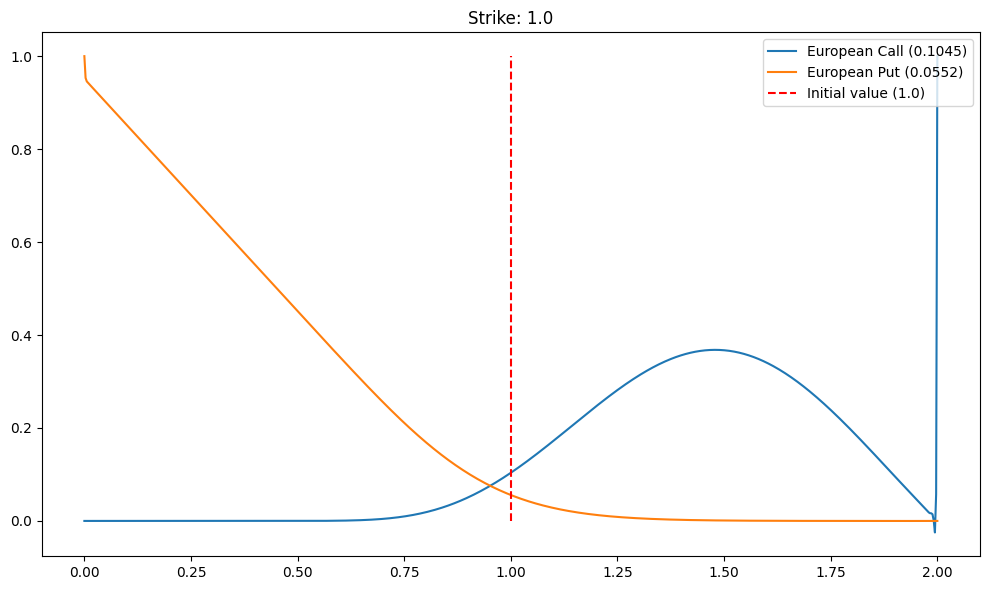

In [3]:
ue_fdm = EuropeanFDM(l=700, m=100)
xmin, xmax = 0, 2 * model.initial_value

plt.figure(figsize=(10, 6), dpi=100)

# Call
ue_call = EuropeanCall(maturity, strike)
boundary_min = 0
boundary_max = xmax - ue_call.strike * np.exp(
    -model.interest_rate * (ue_call.maturity - np.linspace(0, ue_call.maturity, ue_fdm.m))
)
x, u = ue_fdm.solve(model, ue_call, xmin, xmax, boundary_min, boundary_max)
plt.plot(x, u, label=f"{ue_call.name()} ({u[int(len(u) / 2)]:.4f})")

# Put
ue_put = EuropeanPut(maturity, strike)
boundary_min = 0
boundary_max = (
    ue_put.strike * np.exp(-model.interest_rate * (ue_put.maturity - np.linspace(0, ue_put.maturity, ue_fdm.m))) - xmax
)
x, u = ue_fdm.solve(model, ue_put, xmin, xmax, boundary_min, boundary_max)
plt.plot(x, u, label=f"{ue_put.name()} ({u[int(len(u) / 2)]:.4f})")

plt.title(f"Strike: {strike}")
plt.vlines(initial_value, 0, 1, linestyles="dashed", colors="red", label=f"Initial value ({initial_value})")
plt.tight_layout()
plt.legend(loc="upper right")

PDE for Asian options (in Black-Scholes model):

$$
\begin{cases}
    \partial_t v+\frac{1}{2}\sigma^2 x^2 \partial^2_x v + rx \partial_x v + x \partial_a v - rv = 0 \\
    v(T,x,a) = G(a)
\end{cases}
$$

In [4]:
# asian_fdm = AsianFDM(l=500, m=100)

# plt.figure(figsize=(8, 6), dpi=100)
# for contract in [AsianCall(maturity, strike), AsianPut(maturity, strike)]:
#     x, u = asian_fdm.solve(model, contract, min_x=0, max_x=2 * initial_value)
#     plt.plot(x, u, label=f"{contract.name()}")

# plt.vlines(initial_value, 0, 1, linestyles="dashed", colors="red", label=f"Initial value ({initial_value})")
# plt.tight_layout()
# plt.legend(loc="upper right")